## Test for IAS

In [42]:
import numpy as np

ias_time = np.genfromtxt("Openhealth_S-Grippal.csv", delimiter=";", dtype="U75", skip_header=1)
print(ias_time)

[['2009-07-01' '1,7' '2,2' '2,3']
 ['2009-07-02' '3,4' '2,1' '2,3']
 ['2009-07-03' '2,1' '2,1' '2,3']
 ...
 ['2021-02-28' '226,4' '15,3' 'NA']
 ['2021-03-01' '15,8' '15' 'NA']
 ['2021-03-02' '2,5' '14,6' 'NA']]


In [51]:
time = ias_time[:4234,0]
ias_brut = ias_time[:,1]
ias_lisse = ias_time[:,2]
ias_brut2 = np.array([])

for elem in ias_brut:
    elem = elem.replace(",",".")
    
    ias_brut2 = np.append(ias_brut2, elem)
    
#print(ias_brut2)
ias_brut = ias_brut2.astype(np.float)
time = time.astype(np.datetime64)
print(time)
#print(ias_brut)

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / np.float(N)

ias_brut_glissant = running_mean(ias_brut,30)
print(ias_brut_glissant)


['2009-07-01' '2009-07-02' '2009-07-03' ... '2021-01-30' '2021-01-31'
 '2021-02-01']
[ 35.84333333  35.90666667  35.86666667 ... 115.08       115.07
 113.81666667]


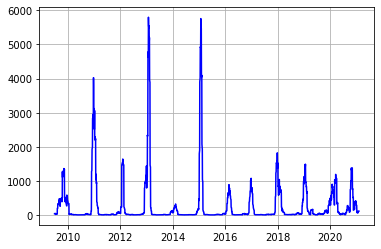

In [52]:
import matplotlib.pyplot as plt



fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(time,ias_brut_glissant, color='blue')
#ax.plot(ias_time[:,0],ias_time[:,2], color='lightblue', linewidth=3, label = "Lissé")

plt.grid()


plt.show()